# Final Project Submission

* Students name: Lucy Munge, Curtis Kariuki and Frank Kiptoo
* Student pace: Part Time
* Instructor name: Stella Waithera


# King County House Sales Analysis & Regression Modeling

# Project Overview

## Business Problem

The real estate agency, Amani is facing a challenge in providing valuable advice to homeowners regarding home renovations. Homeowners often inquire about the potential increase in the estimated value of their homes after making specific renovations or improvements. The agency needs to develop a predictive model that can accurately estimate the impact of various renovation projects on a home's market value within the northwestern county.

The goal is to offer data-driven recommendations to homeowners, enabling them to make informed decisions about which renovations to undertake and how these renovations will affect the resale value of their homes.

The questions to be answered are:
1. How does the number of bedrooms, bathrooms, grade and square footage of a house correlate with its sale price in King County?
2. How much can a homeowner expect the value of their home to increase after a specific renovation project?
3. Which renovation projects have the most significant impact on a home's market value in the northwestern county?
4. Are there specific combinations of renovation projects that provide an interdependent effect on a home's market value?

## Data Understanding

This project uses the King County House Sales dataset, found in kc_house_data.csv. The file contains information on over 21,000 housing units. The data is organized into a dataframe with several columns containing information on the housing units.
The following are the columns contained in the dataset along with their descriptions:
* id - Unique identifier for a house
* date - Date house was sold
* price - Sale price (prediction target)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - Square footage of living space in the home
* sqft_lot - Square footage of the lot
* floors - Number of floors (levels) in house
* waterfront - Whether the house is on a waterfront
Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* view - Quality of view from house
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* condition - How good the overall condition of the house is. Related to maintenance of house.
See the King County Assessor Website for further explanation of each condition code
* grade - Overall grade of the house. Related to the construction and design of the house.
See the King County Assessor Website for further explanation of each building grade code
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - ZIP Code used by the United States Postal Service
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

The columns used in the analysis are:
* price - Predictor Variable
* condition
* bedrooms
* bathrooms
* sqft_living
* floors

In [1]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.api as sm
import numpy as np
import scipy.stats as statsmodels
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Data Cleaning and Preparation

In [2]:
# Loading the Data File into a Dataframe
housing_data = pd.read_csv('data/kc_house_data.csv')

In [3]:
# previewing the first 10 rows
housing_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
# check no.or rows and columns
housing_data.shape

(21597, 21)

In [5]:
# check columns names
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# check the overview of the df
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the overview, it can be seen that the all the columns except waterfront, view and yr_renovated have some missing values. The dataframe has 21597 records with varying data types of floats, integers and objects.

In [7]:
# Calling the info() method on the housing_data object, which displays a summary of the dataframe
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

For our modeling analysis, the following columns will be dropped so as to focus the analysis on specific features of interest since they may not contribute significantly to the analysis or modeling process.
* date
* id
* sqft_lot
* waterfront
* view
* grade
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* zipcode
* lat
* long
* sqft_living15
* sqft_lot15

In [8]:
# create a new df with the relevant columns that we need for our model
housing_new_data = housing_data.drop(['date','id',
       'sqft_lot', 'waterfront', 'view','grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)

In [9]:
housing_new_data

,price,bedrooms,bathrooms,sqft_living,floors,condition
0,221900.0,3,1.00,1180,1.0,Average
1,538000.0,3,2.25,2570,2.0,Average
2,180000.0,2,1.00,770,1.0,Average
3,604000.0,4,3.00,1960,1.0,Very Good
4,510000.0,3,2.00,1680,1.0,Average
...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average
21593,400000.0,4,2.50,2310,2.0,Average
21594,402101.0,2,0.75,1020,2.0,Average
21595,400000.0,3,2.50,1600,2.0,Average


In [10]:
# get a statistical summary of the columns in the dataframe
housing_new_data.describe()
housing_new_data

,price,bedrooms,bathrooms,sqft_living,floors,condition
0,221900.0,3,1.00,1180,1.0,Average
1,538000.0,3,2.25,2570,2.0,Average
2,180000.0,2,1.00,770,1.0,Average
3,604000.0,4,3.00,1960,1.0,Very Good
4,510000.0,3,2.00,1680,1.0,Average
...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average
21593,400000.0,4,2.50,2310,2.0,Average
21594,402101.0,2,0.75,1020,2.0,Average
21595,400000.0,3,2.50,1600,2.0,Average


In [11]:
#Checking for missing values in our data set
housing_new_data.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
dtype: int64

From the above, the columns do not have any missing values

## Visualization of Price vs Columns

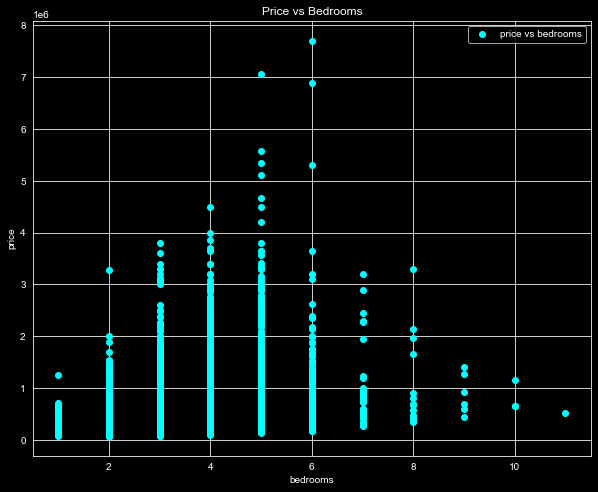

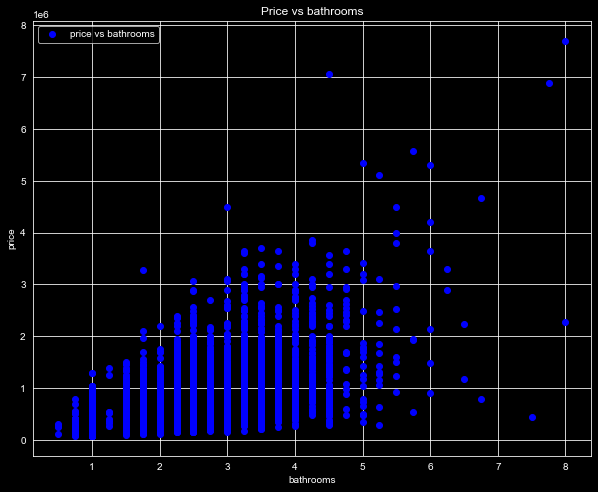

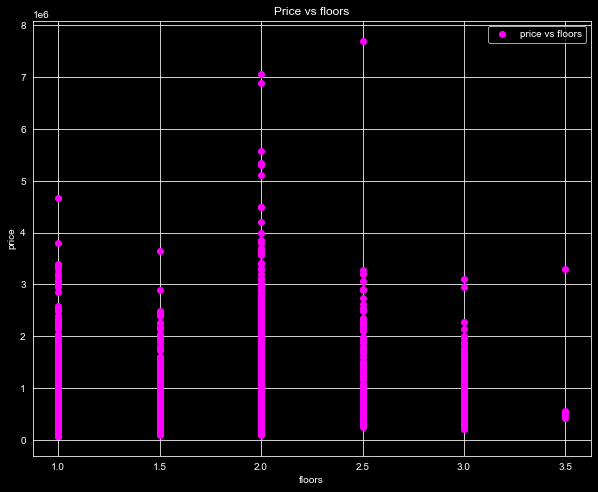

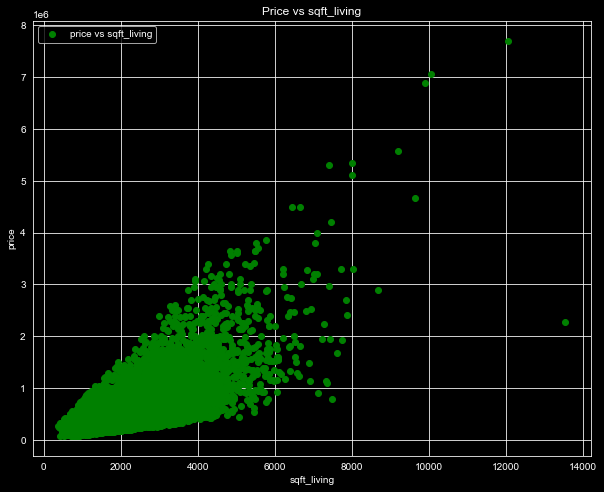

In [42]:
# Create scatter plots showing the corr between the price and bedrooms, bathrooms, sqft_living, floors
plt.figure(figsize=(10,8))
plt.style.use("dark_background")
plt.scatter(data=housing_new_data, x='bedrooms', y='price', color='cyan')

plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Price vs Bedrooms')
plt.legend(['price vs bedrooms'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_new_data, x='bathrooms', y='price', color='blue')

plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Price vs bathrooms')
plt.legend(['price vs bathrooms'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_new_data, x='floors', y='price', color='magenta')

plt.xlabel('floors')
plt.ylabel('price')
plt.title('Price vs floors')
plt.legend(['price vs floors'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_new_data, x='sqft_living', y='price', color='green')

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Price vs sqft_living')
plt.legend(['price vs sqft_living'])
plt.show();

From the above scatter plots, we can observe that sqft_living has a continuous positive correlation with price.

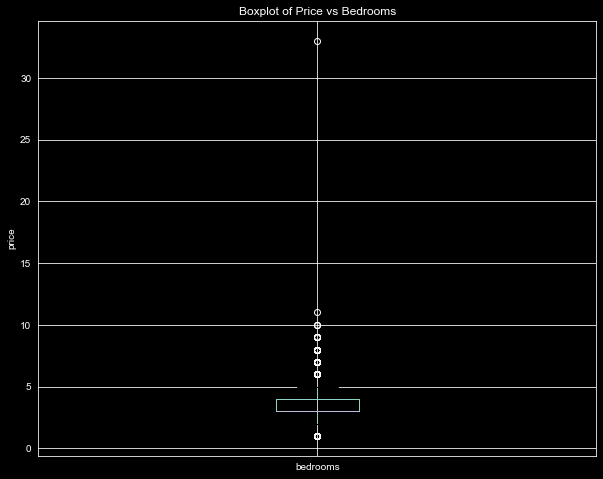

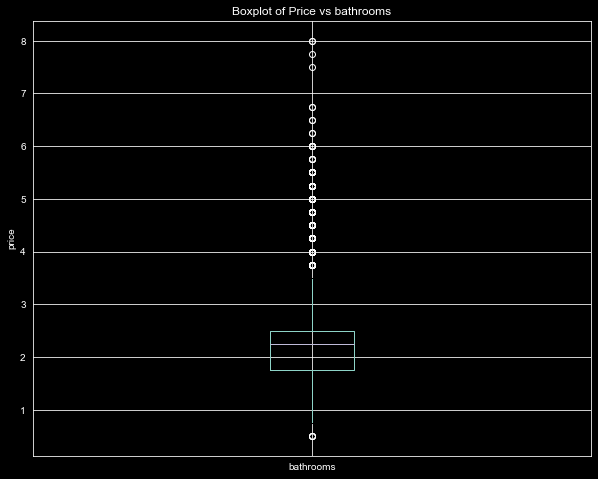

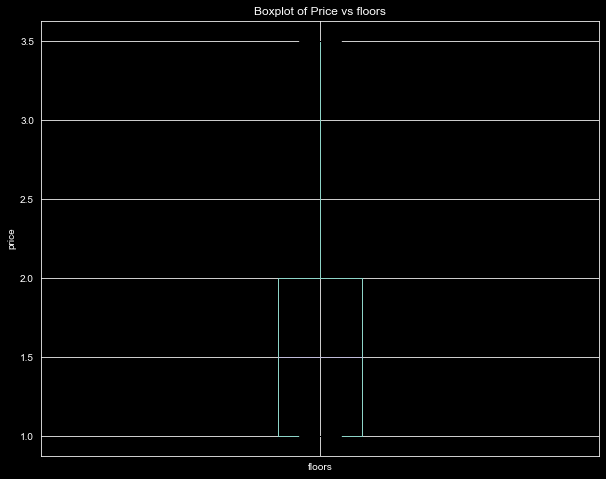

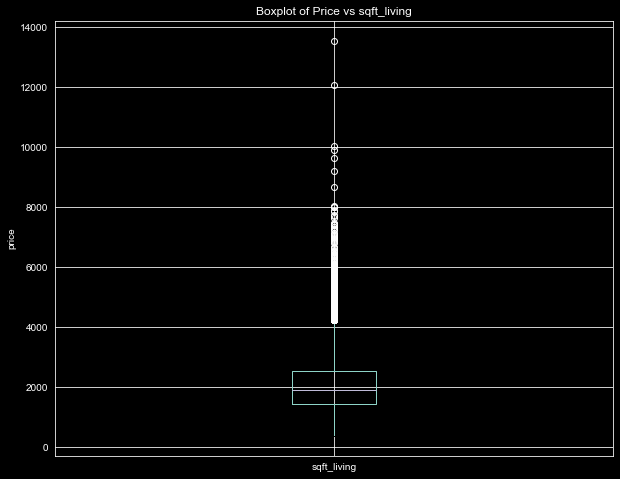

In [13]:
# Create a boxplot for all columns
plt.figure(figsize=(10,8))
housing_new_data.boxplot(column='bedrooms')
plt.title('Boxplot of Price vs Bedrooms')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_new_data.boxplot(column='bathrooms')
plt.title('Boxplot of Price vs bathrooms')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_new_data.boxplot(column='floors')
plt.title('Boxplot of Price vs floors')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_new_data.boxplot(column='sqft_living')
plt.title('Boxplot of Price vs sqft_living')
plt.ylabel('price')
plt.show()


In [14]:
# Describe the new housing data
housing_new_data.describe()

,price,bedrooms,bathrooms,sqft_living,floors
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000


From the boxplots above, bedrooms, bathrooms and sqft_living have outliers but the bedroom data has a significant outlier which we will need to explore further and decide whether to keep it or remove it. Floors data has no outliers.
It would be safe to assume that this was due to a data entry error of inputing 33 instead of 3, we can replace 33 with 3.

### Handling Outlier in Bedrooms

In [15]:
# Fixing incorrect bedroom data
housing_new_data.loc[(housing_new_data.bedrooms == 33), 'bedrooms'] = 3

In [16]:
# Describe the updated housing data with replaced outlier
housing_new_data.describe()

,price,bedrooms,bathrooms,sqft_living,floors
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.494096
std,3.673681e+05,0.904096,0.768984,918.106125,0.539683
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,3.500000


# Modeling

We'll compute and examine the correlation coefficients, for each feature in relation to 'price.' A positive correlation suggests that as the feature increases, 'price' tends to increase, while a negative correlation implies that as the feature increases, 'price' tends to decrease. A correlation close to 0 indicates a weak or no linear relationship. By understanding these correlations, we can make informed decisions about the selection of our features.

In [17]:
# Get the correlation of 'price' with other columns and sort values in descending order
housing_new_data.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.701917
bathrooms      0.525906
bedrooms       0.315954
floors         0.256804
Name: price, dtype: float64

From the output above, the following can be observed:
* 'price' has a perfect correlation of 1.000000 with itself, which is expected since any variable has a perfect correlation with itself.
* 'sqft_living' has the highest positive correlation with 'price' at approximately 0.7019. This indicates that there is a strong positive linear relationship between the square footage of living space ('sqft_living') and the price of houses. As the square footage of living space increases, the price tends to increase.
* 'bathrooms' has a positive correlation of approximately 0.5259 with 'price,' suggesting that as the number of bathrooms in a house increases, the price tends to increase, although the relationship is not as strong as with 'sqft_living.'
* 'bedrooms' has a positive correlation of approximately 0.3159 with 'price,' indicating that as the number of bedrooms increases, the price tends to increase, but again, this relationship is weaker than with 'sqft_living' and 'bathrooms.'
* 'floors' has a positive correlation of approximately 0.2568 with 'price,' suggesting that as the number of floors in a house increases, the price tends to increase, but this relationship is also weaker compared to 'sqft_living' and 'bathrooms.'

In [18]:
# check data types
housing_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   condition    21597 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1012.5+ KB


This output shows that we can use all columns except for condition in a multiple linear regression, without the model crashing.

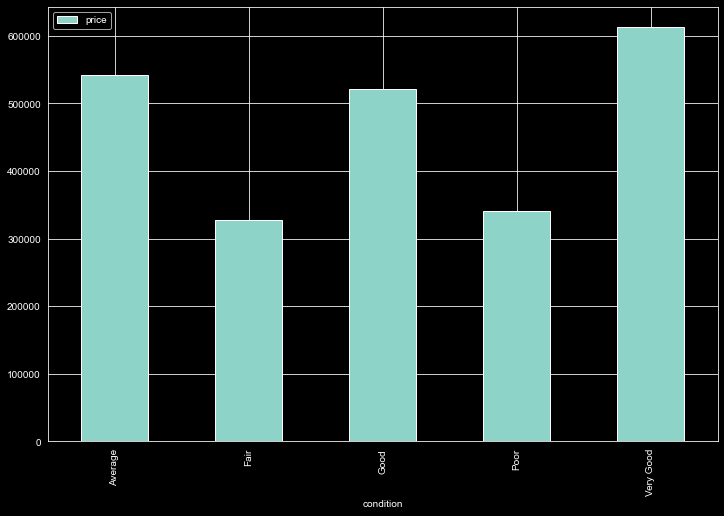

In [19]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Group the housing_new_data by condition and calculate the mean price
grouped_data = housing_new_data.groupby("condition").mean('price')

# Plot the average price for each condition as a bar chart
grouped_data.plot.bar(y='price', ax=ax);

In [20]:
# check value counts of origin
housing_new_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

## Baseline Model: Simple Linear Regression

For our multiple linear regression we will build a simple linear regression to be the baseline in order to evaluate our model.

Since sqft_living is the feature with the strongest correlation, we will build a simple linear regression with that.

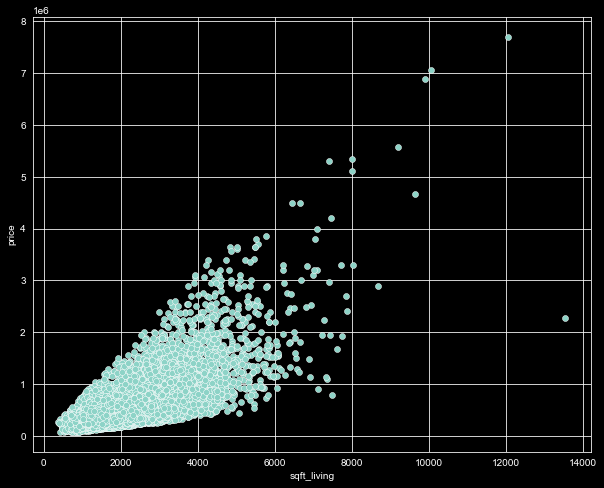

In [21]:
# set the figure size
plt.figure(figsize=(10, 8))
# create seaborn plot
sns.scatterplot(x = 'sqft_living', y ='price', data = housing_new_data);

In [22]:
# Extracting value for y variable for our baseline model
y = housing_new_data["price"]
# Extracting value for X variable for our baseline model
X_baseline = housing_new_data[["sqft_living"]]

In [23]:
# Fit the OLS model with the baseline variables
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Print the summary of the model results
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:19:24   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

### Interpretation of Results

R-squared (R²): The R-squared value is 0.493, indicating that approximately 49.3% of the variance in 'price' can be explained by the linear relationship with 'sqft_living'. 

Model Summary: This is a simple linear regression model (Model: OLS) with 'sqft_living' as the only independent variable.

The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05

Coefficients: The coefficients section provides the equation for the linear regression model:

The intercept (constant term) is -43,990 (const).
The coefficient for 'sqft_living' is 280.863.
So, the simple linear regression equation based on this output is:

price = -43,990 + 280.863 * sqft_living

This equation represents the relationship between the 'price' of a house and its square footage of living space ('sqft_living'). For each additional square foot of living space, the 'price' is expected to increase by 280.863 units when all other factors remain constant.

## Simple Linear Regression Visualization

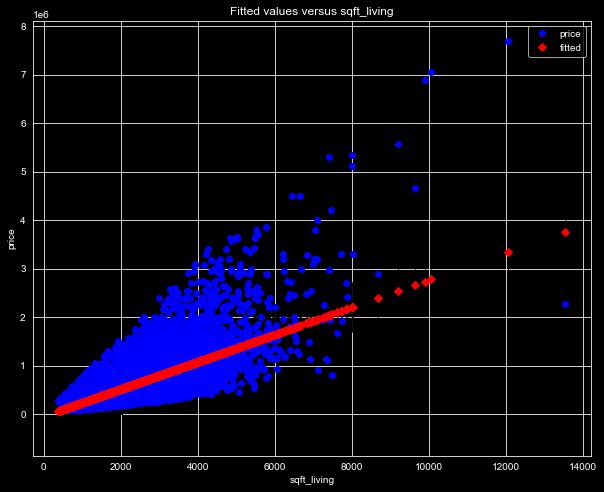

In [24]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the fit using the baseline_results
sm.graphics.plot_fit(baseline_results, "sqft_living", ax=ax)

# Display the plot
plt.show()

The plot above shows the actual vs. predicted values.

### Regression line

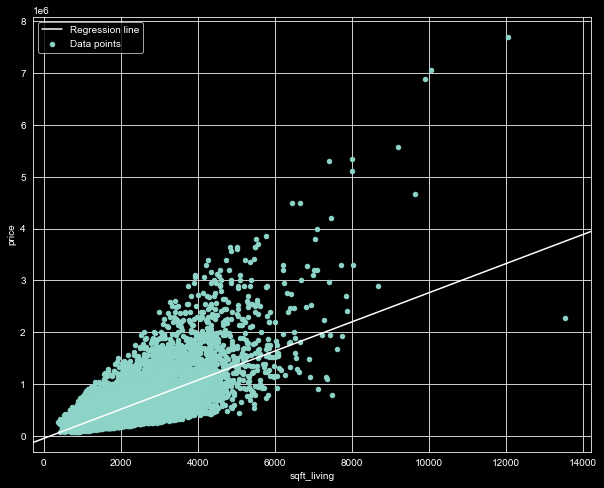

In [25]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the fit using the baseline_results
housing_new_data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="white")

# Display the plot
ax.legend();

### Residuals

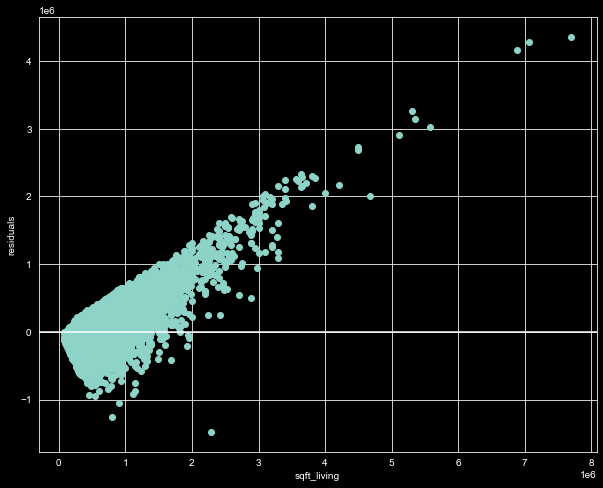

In [26]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of "mpg" against residuals
ax.scatter(housing_new_data["price"], baseline_results.resid)

# Add a horizontal line at y=0
ax.axhline(y=0, color="white")

# Set x and y labels
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

## 2nd Model: Adding another Independent variable

In [27]:
# Extracting values for X variable for our second model
X_second = housing_new_data[["sqft_living", "bedrooms"]]
X_second

,sqft_living,bedrooms
0,1180,3
1,2570,3
2,770,2
3,1960,4
4,1680,3
...,...,...
21592,1530,3
21593,2310,4
21594,1020,2
21595,1600,3


In [28]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:19:26   Log-Likelihood:            -2.9973e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.177e+04   6770.153     13.556      

### Interpretation of Results

R-squared (R²): The R-squared value is 0.508, indicating that approximately 50.8% of the variance in 'price' can be explained by the linear relationship with 'sqft_living' and 'bedrooms'. R-squared measures the goodness of fit, and a higher value suggests that the model explains a larger portion of the variance in the dependent variable.

Model Summary: This is a multiple linear regression model (Model: OLS) with 'sqft_living' and 'bedrooms' as independent variables.

The model coefficients (const, sqft_living, and bedrooms) are all statistically significant, with t-statistic p-values well below 0.05


Coefficients: The coefficients section provides the equation for the multiple linear regression model:

The intercept (constant term) is approximately 91,770 (const). This means that, when all independent variables are zero , the estimated baseline price of a home is around $ 91,770

The coefficient for 'sqft_living' is approximately 317.6347. This indicates that for each additional square foot of living space in a home, we expect the price to increase by approximately $317.63, all else being equal.

The coefficient for 'bedrooms' is approximately -62,950. This suggests that for each additional bedroom in a home, we expect the price to decrease by approximately $ 62,950, all else being equal.

So, the multiple linear regression equation based on this output is:

### price = 91,770 + (317.6347 * sqft_living) - (62,950 * bedrooms)

This equation represents the relationship between the 'price' of a house and its square footage of living space ('sqft_living') and the number of bedrooms ('bedrooms'). Each coefficient represents the change in the 'price' associated with a one-unit change in the respective independent variable, holding all other variables constant.

### Multiple Linear Regression Visualization

### Model Fit

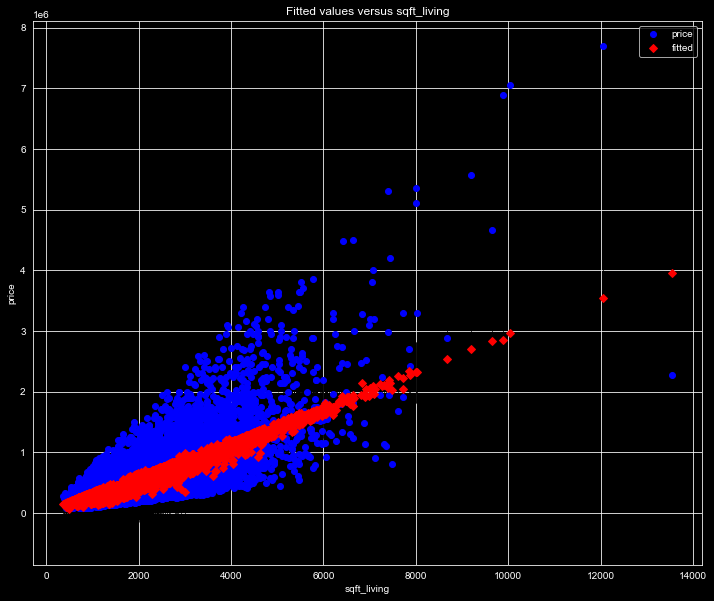

In [29]:
# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting the fit using statsmodels' plot_fit function
sm.graphics.plot_fit(second_results, "sqft_living", ax=ax)

# Displaying the plot
plt.show();

This shows the true (blue) vs. predicted (red) values, with the particular predictor (in this case, sqft_living) along the x-axis.

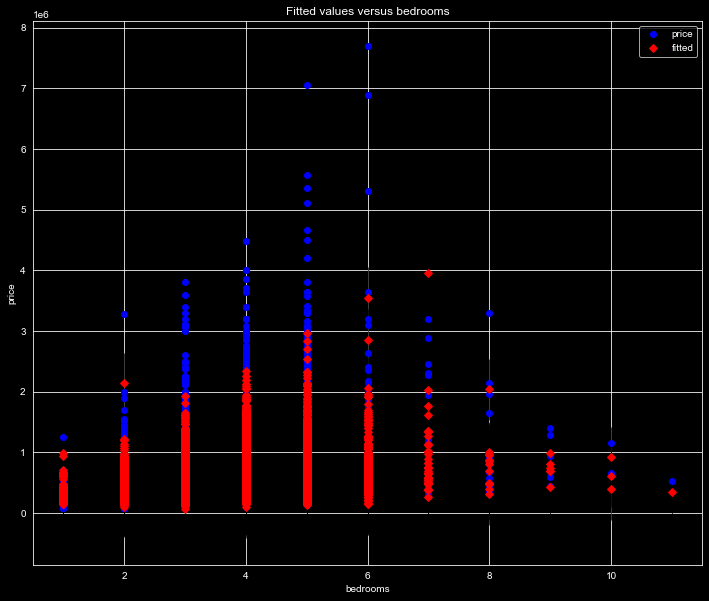

In [30]:
# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting the fit using statsmodels' plot_fit function
sm.graphics.plot_fit(second_results, "bedrooms", ax=ax)

# Displaying the plot
plt.show();

The plot above shows the fit for the other predictor, bedrooms

### Partial Regression Plot

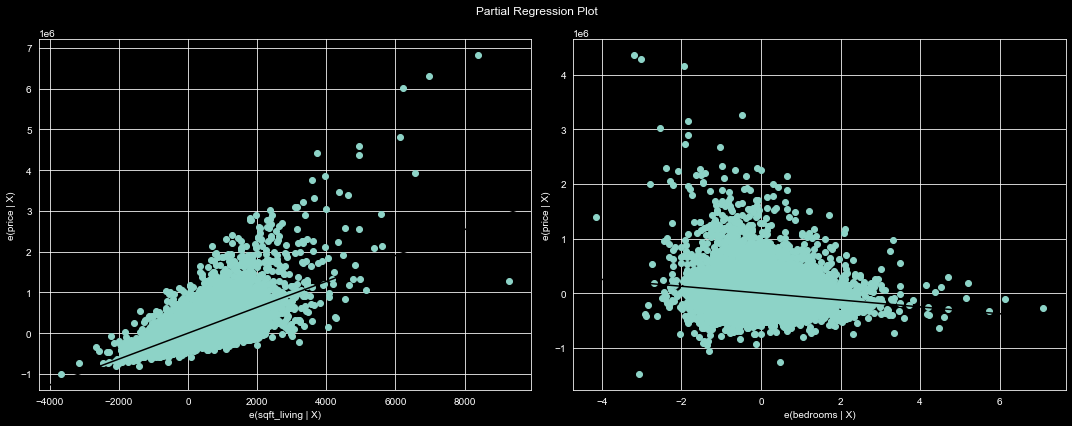

In [31]:
# Create a figure with a specific size
fig = plt.figure(figsize=(15, 6))

# Plot partial regression grid with specified variables
sm.graphics.plot_partregress_grid(second_results, exog_idx=["sqft_living", "bedrooms"], fig=fig)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show();

### Plotting Residuals

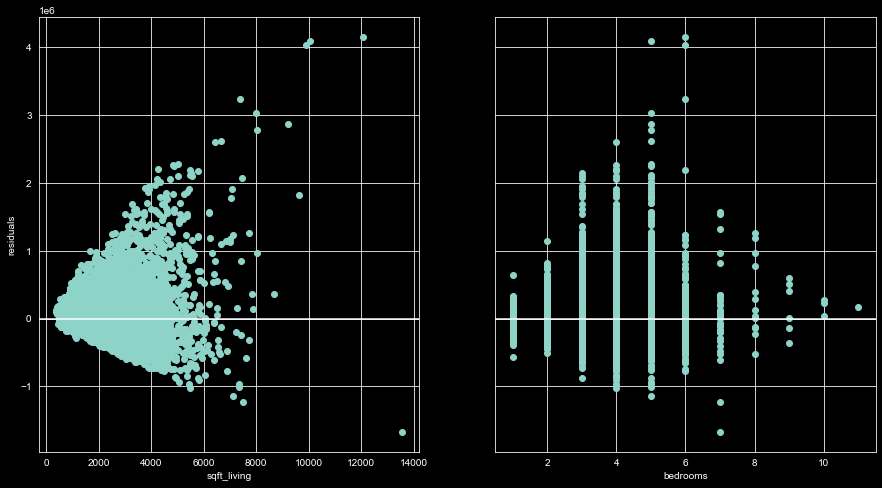

In [32]:
# Create figure with 2 subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 8), sharey=True)

# First subplot - sqft_living
sqft_living_ax = axes[0]
sqft_living_ax.scatter(housing_new_data["sqft_living"], second_results.resid)
sqft_living_ax.axhline(y=0, color="white")
sqft_living_ax.set_xlabel("sqft_living")
sqft_living_ax.set_ylabel("residuals")

# Second subplot - bedrooms
bedrooms_ax = axes[1]
bedrooms_ax.scatter(housing_new_data["bedrooms"], second_results.resid)
bedrooms_ax.axhline(y=0, color="white")
bedrooms_ax.set_xlabel("bedrooms");

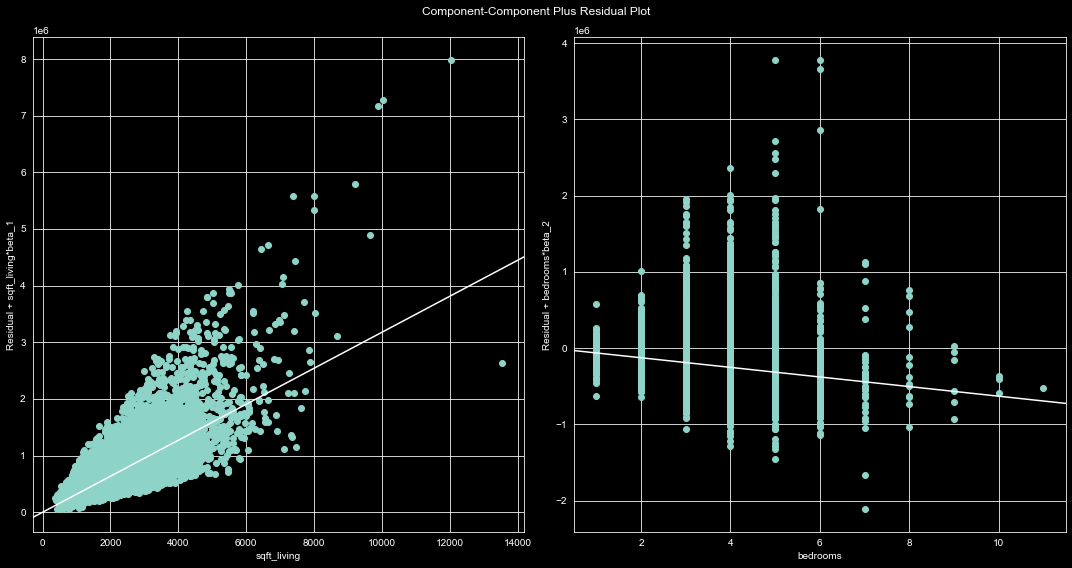

In [33]:
# Create figure size
fig = plt.figure(figsize=(15, 8))

# Plotting the CCPR grid
sm.graphics.plot_ccpr_grid(second_results, exog_idx=["sqft_living", "bedrooms"], grid=(1, 2), fig=fig)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### Plotting All Four at Once

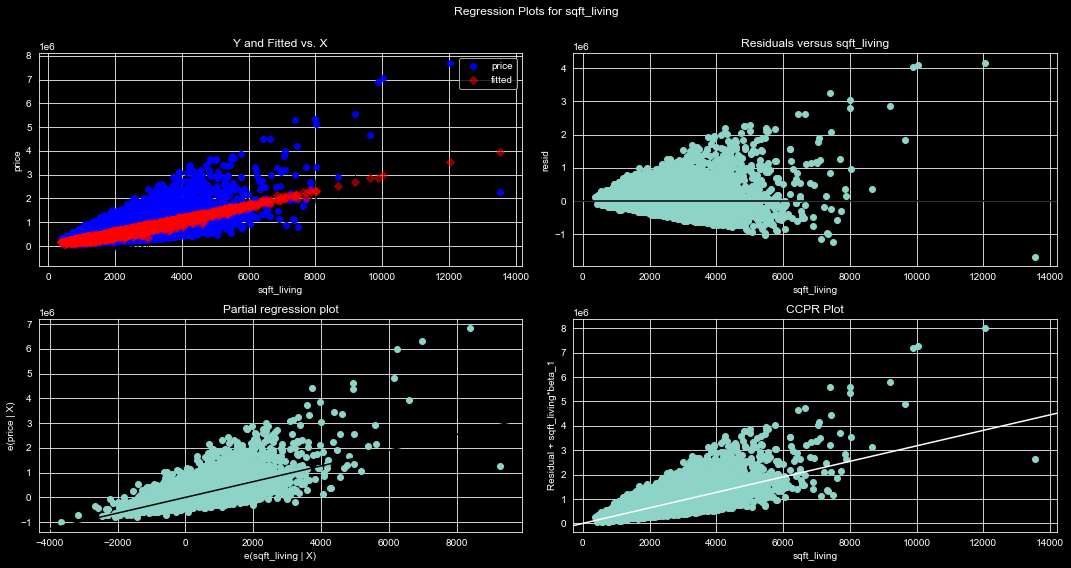

In [34]:
# Create a figure with a specified size
fig = plt.figure(figsize=(15, 8))

# Plot the regression with the "sqft_living" as the exogenous variable
sm.graphics.plot_regress_exog(second_results, "sqft_living", fig=fig)

# Display the plot
plt.show()

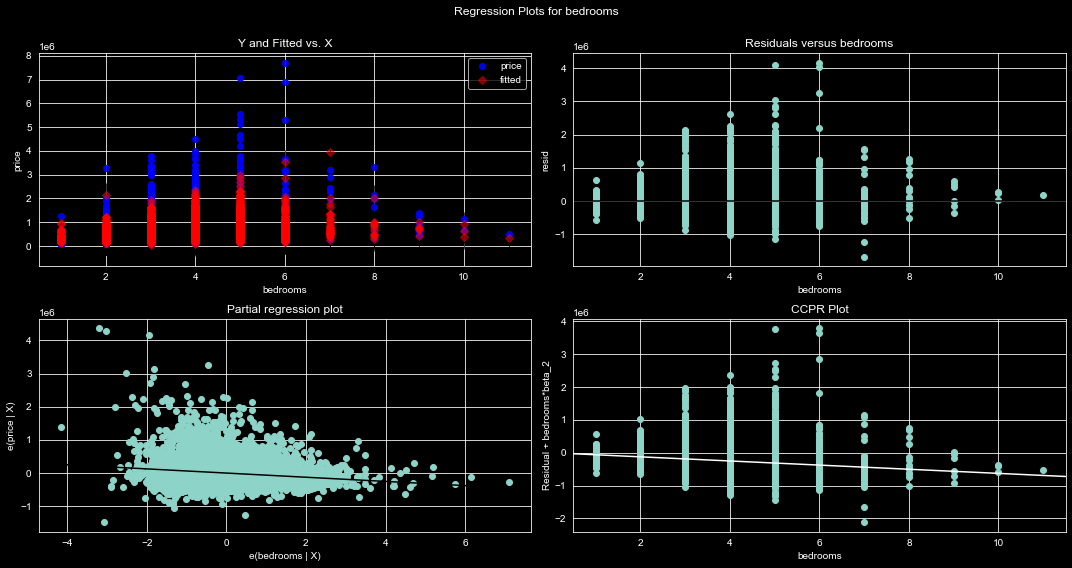

In [35]:
# Create a figure with specified size
fig = plt.figure(figsize=(15, 8))

# Plot regresion of exog variable against bedrooms
sm.graphics.plot_regress_exog(second_results, "bedrooms", fig=fig)

# Display the plot
plt.show()

## 3rd Model: Multiple Regression with Many Features including the One-Hot Encoded Variables

Since we have a model with 1 predictor (sqft_living) as well as a model with 2 predictors (sqft_living and bedrooms), we will try a model that uses all of the available numeric columns as features.

In [36]:
# Extracting values for y variable
y = housing_new_data["price"]

# Extracting values for X variables
X_all = housing_new_data[["sqft_living", "bathrooms", "bedrooms", "floors", "condition"]]
X_all

,sqft_living,bathrooms,bedrooms,floors,condition
0,1180,1.00,3,1.0,Average
1,2570,2.25,3,2.0,Average
2,770,1.00,2,1.0,Average
3,1960,3.00,4,1.0,Very Good
4,1680,2.00,3,1.0,Average
...,...,...,...,...,...
21592,1530,2.50,3,3.0,Average
21593,2310,2.50,4,2.0,Average
21594,1020,0.75,2,2.0,Average
21595,1600,2.50,3,2.0,Average


In [37]:
# Converting the categorical variables into dummy variables
X_all = pd.get_dummies(X_all, columns=["condition"], drop_first=True, dtype=int)

# Displaying the resulting dataframe
X_all

,sqft_living,bathrooms,bedrooms,floors,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,1.00,3,1.0,0,0,0,0
1,2570,2.25,3,2.0,0,0,0,0
2,770,1.00,2,1.0,0,0,0,0
3,1960,3.00,4,1.0,0,0,0,1
4,1680,2.00,3,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...
21592,1530,2.50,3,3.0,0,0,0,0
21593,2310,2.50,4,2.0,0,0,0,0
21594,1020,0.75,2,2.0,0,0,0,0
21595,1600,2.50,3,2.0,0,0,0,0


In [38]:
# Create the OLS model with y and X_all as input
third_model = sm.OLS(y, sm.add_constant(X_all))

# Fit the model and save the results
third_results = third_model.fit()

# Print the summary of the results
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2893.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:19:33   Log-Likelihood:            -2.9952e+05
No. Observations:               21597   AIC:                         5.991e+05
Df Residuals:                   21588   BIC:                         5.991e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.492e+04   8

# Interpretation of Results

R-squared (R²): The R-squared value is 0.517, indicating that approximately 51.7% of the variance in 'price' can be explained by the linear relationship with the eight independent variables ('sqft_living', 'bathrooms', 'bedrooms', 'floors', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good'). 

The model is statistically significant overall, with an F-statistic p-value well below 0.05

const, sqft_living, bathrooms, bedrooms, floors, condition_Good, condition_Very Good are all statistically significant with p values less that our significance level, alpha of 0.05. This means that these values have a significant effect on 'price'.
condition_Fair and condition_Poor have p-values greater than our alpha of 0.05, 0.81 and 0.35
respectively indicating that they are not statistically significant in predicting 'price'.

Model Summary: This is a multiple linear regression model (Model: OLS) with eight independent variables.

Coefficients: The coefficients section provides the equation for the multiple linear regression model:

The intercept (constant term) is approximately 44,920 (const). This means that, when all independent variables are zero (which may not be meaningful in this context), the estimated baseline price of a home is around $ 44,290.

The coefficient for 'sqft_living' is approximately 311.64. This indicates that for each additional square foot of living space in a home, we expect the price to increase by approximately $311.64, all else being equal.

The coefficient for 'bathrooms' is approximately 11,990. his suggests that for each additional bathroom in a home, we expect the price to increase by approximately $11,990, all else being equal.

The coefficient for 'bedrooms' is approximately -67,170. This indicates that for each additional bedroom in a home, we expect the price to decrease by approximately $67,170, all else being equal.

The coefficient for 'floors' is approximately 17,060. his suggests that for each additional floor in a home, we expect the price to increase by approximately $17,060, all else being equal.

The coefficient for 'condition_Fair' is approximately -4768.5025.

The coefficient for 'condition_Good' is approximately 49,570.

The coefficient for 'condition_Poor' is approximately 44,370.

The coefficient for 'condition_Very Good' is approximately 122,500.

So, the multiple linear regression equation based on this output is:

In this regression, a condition of average is the reference category. his has implications for the interpretation of const as well as the other condition features.

First, const means that all other variables are 0. This means sqft_living is 0, bathrooms is 0, the rest of the features are 0 and condition is average.

condition_Fair means the difference associated with a house condition being fair vs an average house. In other words, compared to an average house, we see an associated decrease of about -4,590.8019 USD for fairly conditioned house.
condition_Good is also comparing to an average house. We see an associated increase of about 48,930 USD for a house in good condition compared to a house in average condition.

### price = 44,920 + (311.64 * sqft_living) + (11,990 * bathrooms) - (67,170 * bedrooms) + (17,060 * floors) - (4768.5025 * condition_Fair) + (49,570 * condition_Good) + (44,370 * condition_Poor) + (122,500 * condition_Very Good)

This equation represents the relationship between the 'price' of a house and multiple independent variables, including square footage of living space ('sqft_living'), the number of bathrooms ('bathrooms'), the number of bedrooms ('bedrooms'), the number of floors ('floors'), and four categorical variables representing different conditions ('condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good'). Each coefficient represents the change in the 'price' associated with a one-unit change in the respective independent variable, holding all other variables constant.

### Model with Many Features Visualization

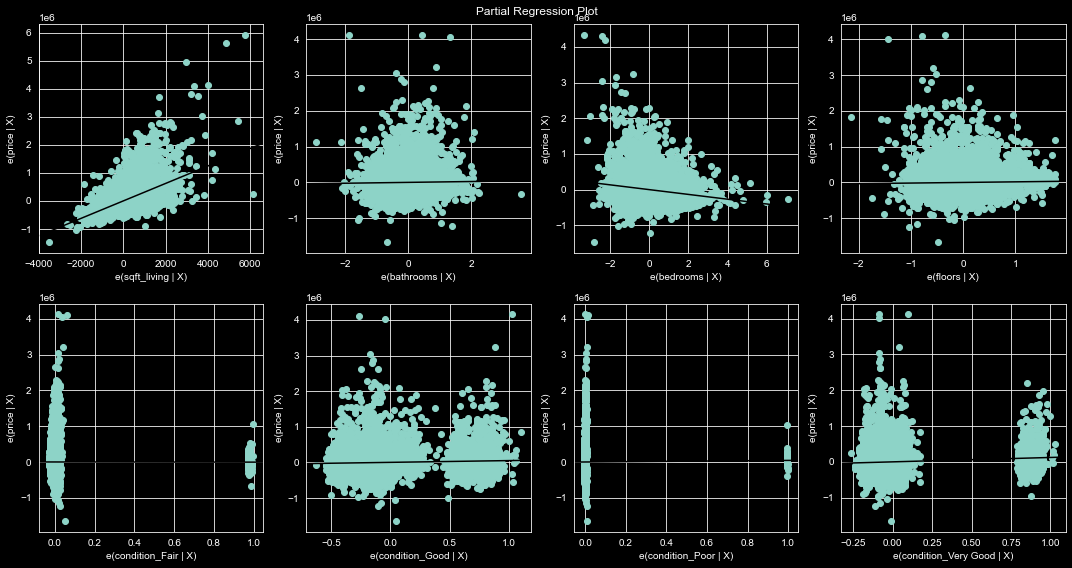

In [39]:
# Create a figure size 
fig = plt.figure(figsize=(15, 8))

# Plot partregress grid using third_results as the model
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_all.columns.values),
    grid=(2, 4),
    fig=fig
)

# Display the plot
plt.show()

# Model Evaluation

The common error-based metrics for regression models include Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). 
To determine if the model is statistically significant at a significance level of 0.05, we need to examine the F-statistic and the p-values associated with the coefficients of the independent variables.

### F-statistic:

The F-statistic measures the overall statistical significance of the model.
In this case, the F-statistic is approximately 2893, with a corresponding p-value of 0.00.
We can state the null hypothesis for the F-test as that all coefficients in the model are equal to zero i.e. none of the independent variables have a significant effect on the dependent variable, price
The alternative hypothesis can be that at least one coefficient is not equal to zero

Since the p-value associated with the F-statistic is very close to zero (p < 0.05), we can reject the null hypothesis. 
This indicates that the overall model is statistically significant, meaning that at least one of the independent variables has a significant effect on the dependent variable, price.

We will also determine the measure of goodness of fit with R-Squared, which is one of the error based metrics used for model evaluation as it provides a measure of the explained variance with the independent variables. In addition we will determine the  Root Mean Squared Error RMSE of our model to quantify the average difference between the actual observed values and the predicted values, taking into account both the magnitude and direction of errors.

In general:

A higher R² value indicates that the model explains a larger portion of the variance in price suggesting a better fit.

A lower R² value suggests that the model's independent variables do not explain as much of the variance in price.

While:

Lower RMSE values indicate that the model's predictions are closer to the actual 'price' values on average, suggesting better model accuracy.

Higher RMSE values indicate that the model's predictions have larger errors compared to the actual 'price' values.

In [40]:
# Calculate the R-squared (R²) for the baseline model
rsquared_baseline = r2_score(y, baseline_results.predict(sm.add_constant(X_baseline)))

# Calculate the R-squared (R²) for the second model
rsquared_second = r2_score(y, second_results.predict(sm.add_constant(X_second)))

# Calculate the R-squared (R²) for the third model
rsquared_third = r2_score(y, third_results.predict(sm.add_constant(X_all)))

# Print the R-squared (R²) values
print("R-squared (R²) for baseline model:", rsquared_baseline)
print("R-squared (R²) for second model:", rsquared_second)
print("R-squared (R²) for third model:", rsquared_third)


R-squared (R²) for baseline model: 0.49268789904035093
R-squared (R²) for second model: 0.5082439553646637
R-squared (R²) for third model: 0.5173958733954687


## Intepretation of Results

R-squared (R²) for the Baseline Model (rsquared_baseline):

R² value: 0.4927
The baseline model, which  includes one independent variable, sqft_living, explains approximately 49.27% of the variance in 'price.' In other words, sqft_living in the baseline model collectively accounts for about 49.27% of the variation in house prices.

R-squared (R²) for the Second Model (rsquared_second):

R² value: 0.5082 (approximately)
The second model, which  includes sqft_living and an additional independent variable, bedrooms compared to the baseline, explains approximately 50.68% of the variance in 'price.' It indicates a slight improvement in explanatory power compared to the baseline model.

R-squared (R²) for the Third Model (rsquared_third):

R² value: 0.5174 (approximately)
The third model, with all chosen independent variables, explains approximately 51.59% of the variance in price. It represents the highest level of explanatory power among the models considered.

In [41]:
# Calculate root mean squared error for each model
rmse_baseline = np.sqrt(mean_squared_error(y, baseline_results.predict(sm.add_constant(X_baseline))))
rmse_second = np.sqrt(mean_squared_error(y, second_results.predict(sm.add_constant(X_second))))
rmse_third = np.sqrt(mean_squared_error(y, third_results.predict(sm.add_constant(X_all))))

# Print root mean squared error for each model
print("Root Mean Squared Error (rmse_baseline):", rmse_baseline)
print("Root Mean Squared Error (rmse_second):", rmse_second)
print("Root Mean Squared Error (rmse_third):", rmse_third)

Root Mean Squared Error (rmse_baseline): 261655.00451904474
Root Mean Squared Error (rmse_second): 257612.11800635903
Root Mean Squared Error (rmse_third): 255203.69045515414


## Intepretation of Results

### Root Mean Squared Error (RMSE) for the Baseline Model (rmse_baseline):

RMSE value: 261,655

The RMSE for the baseline model is approximately 261,655.00. This means that, on average, the predictions made by the baseline model have an error of about 261,655.00 USD. In other words, the baseline model's predictions tend to deviate from the actual price values by this amount on average.

### Root Mean Squared Error (RMSE) for the Second Model (rmse_second):

RMSE value: 257612.12

The RMSE for the second model is approximately 257612.12. This indicates that, on average, the predictions made by the second model have a slightly lower error compared to the baseline model, with an average error of about 257,612.12 USD.

### Root Mean Squared Error (RMSE) for the Third Model (rmse_third):

RMSE value: 255203.69

The RMSE for the third model is approximately 255,588.39. This suggests that the third model, possibly a more comprehensive model with additional independent variables, has the lowest average prediction error among the models, with an average error of about 255,203.69 USD.

Based on the provided interpretation of the three model results and the business problem faced by the real estate agency Amani, we can draw the following conclusions

# Conclusion

1. Baseline Model: 

The baseline model, which includes only the 'sqft_living' variable, has an RMSE of approximately 261,655 USD and an R² of 0.4927. While it provides a basic estimate of home prices, it has room for improvement in both prediction accuracy and explanatory power.

2. Second Model: 

The second model, incorporating 'sqft_living' and 'bedrooms,' shows a slight improvement over the baseline. It has a lower RMSE (approximately 257612.12 USD) and a slightly higher R² (0.5082). However, further enhancements are possible.

3. Third Model: 

The third model, including all chosen independent variables, performs the best among the models. It has the lowest RMSE (approximately 255203.69 USD) and the highest R² (0.5174). This model demonstrates the highest prediction accuracy.

The best model chose out of the three is the third model because of:

Model Performance: 

The third model, which incorporates 'condition,' 'bedrooms,' 'bathrooms,' 'sqft_living,' and 'floors,' exhibits the best overall performance among the models considered.

Prediction Accuracy: 

The third model has the lowest Root Mean Squared Error (RMSE) of approximately 255203.69 USD, indicating the highest prediction accuracy among the models. This means that the model's predictions are, on average, the closest to the actual sale prices.

Explanatory Power: 

The third model also has the highest R-squared (R²) value of approximately 0.5174, signifying the greatest explanatory power. It explains about 51.74% of the variance in home prices, suggesting that it provides the most comprehensive understanding of the factors influencing sale values.

The model built offers a valuable tool for the agency to formulate effective pricing strategies. It provides coefficients associated with each feature, allowing the agency to make more precise price estimates based on a property's specific attributes. Additionally, by comparing these estimated prices to real-world prices, the agency can spot instances where properties are priced too high or too low, enabling them to make appropriate adjustments to optimize their sales potential.

In summary, the project study suggests that the number of bedrooms, square footage of living area, condition, number of bedrooms, bathrooms and floors are important factors to consider when determining the price of a home. However, it is essential to consider other market factors and property-specific attributes in conjunction with the findings of this analysis to arrive at an accurate and competitive listing price such as architectural style, lot size and landscaping, upgrades and amenities, historical sales data, market trends, school district, crime rate, zoning and regulations.

# Recommendations

Based on the the business questions and objectives of the project and the third model, which includes 'condition,' 'bedrooms,' 'bathrooms,' 'sqft_living,' and 'floors,' the following are detailed recommendations for the real estate agency Amani:

1. Estimating the Impact of Specific Renovation Projects:

The agency can use the Third Model to provide homeowners with estimates of how specific renovation projects will impact the resale value of their homes.
This will assist homeowners in estimating the impact of specific renovations, create a user-friendly interface or tool where homeowners can input details about their renovation plans, such as the number of bedrooms, bathrooms, the condition of the property, square footage of living space, and the number of floors. The model can then generate predictions of the expected increase in home value after these renovations.
Homeowners can make informed decisions about which renovation projects to prioritize, based on their expected return on investment (ROI). This will empower homeowners to invest in renovations that will maximize their property's resale value.

2. Identifying Renovation Projects with the Most Impact:

Amani can utilize the third model to identify which specific renovation projects or features have the most significant impact on a home's market value in the northwestern county.
They can conduct a feature importance analysis using the third model. This analysis can highlight which variables (e.g., bedrooms, bathrooms, condition) have the most substantial influence on home prices. The model can then provide rankings or insights into which renovations or property features contribute the most to home value. By identifying the most impactful renovation projects and features, the agency can guide homeowners toward investments that are likely to yield the highest returns. This can also inform marketing strategies and property listings for sellers.

3. Correlation of Bedrooms, Bathrooms, Grade, and Square Footage with Sale Price:

They can leverage the third model to explain how the number of bedrooms, bathrooms, the grade of a house, and its square footage correlate with its sale price in King County. They can utilize the model's coefficients and feature importance analysis to explain the correlations between these variables and sale price. This will provide homeowners and buyers with insights into how each of these factors influences home prices, allowing them to make more informed decisions. 
Homeowners can understand which property features are highly valued in the real estate market, potentially guiding them in making renovations or improvements that align with market preferences. Buyers can use this information to assess property values based on their preferences and requirements.

4. Identifying Combinations of Renovation Projects:

The third model will help identify specific combinations of renovation projects that provide an interdependent effect on a home's market value.
They can use the model to analyze the effects of combining different renovation projects. Identify combinations that result in combined effects on home values. This will provide homeowners with recommendations on the combinations of renovations that may maximize their property's resale value.

These recommendations align with the agency's goal of offering comprehensive guidance and enhancing decision-making for clients in the real estate market.